Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 dense_19 (Dense)            (None, 100)               78500     
                                                                 
 dropout_10 (Dropout)        (None, 100)               0         
                                                                 
 dense_20 (Dense)            (None, 100)               10100     
                                                                 
 dropout_11 (Dropout)        (None, 100)               0         
                                                                 
 dense_21 (Dense)            (None, 10)                1010      
                                                                 
Total params: 89610 (350.04 KB)
Trainable params: 896

C:\Users\user\AppData\Roaming\Python\Python310\site-packages\keras\src\initializers\initializers.py:120: UserWarning: The initializer RandomUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


150/150 - 1s - loss: 568.8416 - accuracy: 0.4345 - val_loss: 2.5493 - val_accuracy: 0.6077 - 1s/epoch - 7ms/step
Epoch 2/101
150/150 - 1s - loss: 1.3716 - accuracy: 0.8123 - val_loss: 0.3384 - val_accuracy: 0.9192 - 597ms/epoch - 4ms/step
Epoch 3/101
150/150 - 1s - loss: 0.9716 - accuracy: 0.8483 - val_loss: 0.2533 - val_accuracy: 0.9330 - 568ms/epoch - 4ms/step
Epoch 4/101
150/150 - 1s - loss: 0.6789 - accuracy: 0.8759 - val_loss: 0.2683 - val_accuracy: 0.9234 - 569ms/epoch - 4ms/step
Epoch 5/101
150/150 - 1s - loss: 0.4289 - accuracy: 0.8902 - val_loss: 0.1936 - val_accuracy: 0.9465 - 563ms/epoch - 4ms/step
Epoch 6/101
150/150 - 1s - loss: 0.3338 - accuracy: 0.9078 - val_loss: 0.2232 - val_accuracy: 0.9384 - 569ms/epoch - 4ms/step
Epoch 7/101
150/150 - 1s - loss: 0.3089 - accuracy: 0.9144 - val_loss: 0.1787 - val_accuracy: 0.9472 - 577ms/epoch - 4ms/step
Epoch 8/101
150/150 - 1s - loss: 0.2851 - accuracy: 0.9213 - val_loss: 0.1787 - val_accuracy: 0.9524 - 576ms/epoch - 4ms/step
Epoch

<function matplotlib.pyplot.show(close=None, block=None)>

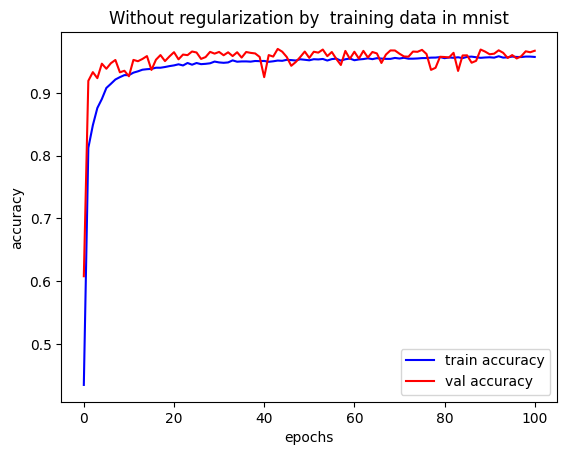

In [13]:
#저번시간에 한거 막 다 섞어서 짬뽕

import tensorflow as tf
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt


#1
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#2이미지 노멀라이제이션
x_train = x_train.astype('float32') #int에서 사이즈를 줄이는 효과도
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

#3원핫인코딩
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

#4 모델빌드


#4-2
init = tf.keras.initializers.RandomUniform(0.0,1.0) #배치 정규화
act = tf.keras.layers.LeakyReLU(alpha=0.3) #리키 렐루


n = 100

dropout_rate = 0.2 #드롭아웃

reg = tf.keras.regularizers.l2(0.1) #weight decay
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(units=n, activation=act, kernel_initializer=init))
model.add(tf.keras.layers.Dropout(rate=dropout_rate))

model.add(tf.keras.layers.Dense(units=n, activation=act, kernel_initializer=init))
model.add(tf.keras.layers.Dropout(rate=dropout_rate))

model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
model.summary()


opt = tf.keras.optimizers.RMSprop(learning_rate=0.01)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

ret = model.fit(x_train, y_train, epochs=101, batch_size=400,
                validation_data = (x_test, y_test), verbose=2)

train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

plt.title("Without regularization by  training data in mnist")
plt.plot(ret.history['accuracy'], "b-", label="train accuracy")
plt.plot(ret.history['val_accuracy'], "r-", label="val accuracy")
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc="best")
plt.show